# Stop Words

Stop words are words that have little or no linguistic value in NLP. Removing these words from the data can improve the accuracy of the language model because it removes inessential words.

While there are common stop words (e.g., "a," "and," "the," etc.), any word can be considered a stop word if it does not contribute to the meaning of the sentence. Stop word removal is a common step in the NLP pipeline, especially for information retrieval, as stop words don't distinguish between relevant and irrelevant content.

Let's take a look at the stop word removal code. Start by creating a new notebook. Then install PySpark and start a new Spark session by entering the following code:

In [ ]:
import os
# Find the latest version of spark 3.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.1'
spark_version = 'spark-3.0.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

In [ ]:
 # Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("StopWords").getOrCreate()

Next, create a DataFrame that's already a list of words. By creating a list of words, we can skip the tokenization step for now. As you recall, tokenization takes input and separates it into a list of words. By creating a DataFrame that already contains a list of words, we are replicating this step:

In [ ]:
# Create DataFrame
sentenceData = spark.createDataFrame([
    (0, ['big', 'data', 'is', 'super', 'powerful']),
    (1, ['This', 'is', 'going', 'to', 'be', 'epic'])
], ['id', 'raw'])

sentenceData.show(truncate=False)

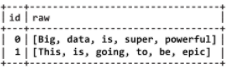

Now import the StopWordsRemover library:

In [ ]:
# Import stop words library
from pyspark.ml.feature import StopWordsRemover

Then, run the StopWordsRemover() function, which takes an input column that will be passed into the function, and an output column to add the results. This is stored in a variable for ease of use later:

In [ ]:
# Run the Remover
remover = StopWordsRemover(inputCol="raw", outputCol="filtered")

Now transform the DataFrame by applying StopWordsRemover and display the result:

In [ ]:
# Transform and show data
remover.transform(sentenceData).show(truncate=False)

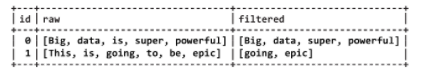

The outcome shows the raw data, or input, and the result of running the StopWordsRemover() function. In the filtered column, all the stop words are removed and the result is displayed.